In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import io
import requests
import re
import warnings
import os
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
sub=pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

**STEP1:查看欄位資訊**

In [ ]:
#欄位資訊
print(train.info())
#前幾列資訊
print(train.head())
#缺失值比例
print(train.isnull().sum()/len(train))
print(test.isnull().sum()/len(test))

**STEP2:簡單資料分析**

In [ ]:
#總體被傳送至異次元比例
train['Transported'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title('Transported vs NOT Transported')
plt.show()

In [ ]:
#Q1:居住星球&被傳送至異次元比例
sns.countplot(x='HomePlanet',hue='Transported',data=train)
plt.title('HomePlanet vs Transported')
plt.show()

居住星球為地球的人被傳送至異次元比例較低。

In [ ]:
#Q2:年齡分布&被傳送至異次元分布
sns.FacetGrid(train , hue='Transported', aspect=3, size=3).map(
    sns.kdeplot , 'Age' , shade=True ).set(xlim=(train['Age'].min(),train['Age'].max())).add_legend()
plt.title('Age vs Transported')
plt.show()

年紀<20歲的人口被傳送至異次元比例較高。

In [ ]:
#Q3:假死狀態與否&被傳送至異次元與否
sns.countplot(x='CryoSleep',hue='Transported',data=train)
plt.title('CryoSleep vs Transported')
plt.show()

處於假死狀態被傳送至異次元比例高。

In [ ]:
#Q4:是否支付vip費用&被傳送至異次元與否
sns.countplot(x='VIP',hue='Transported',data=train)
plt.title('VIP vs Transported')
plt.show()

有無繳交vip費用貌似與被傳送至異次元與否較無相關性。

**STEP3缺失值補充&資料處理**

In [ ]:
#刪除名字欄位
train.drop(['Name'],axis=1,inplace=True)
test.drop(['Name'],axis=1,inplace=True)

#刪除id欄位
train.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['PassengerId'],axis=1,inplace=True)

#刪除cabin欄位
train[['deck','num','side']]=train['Cabin'].str.split('/',expand=True)
test[['deck','num','side']]=test['Cabin'].str.split('/',expand=True)
train.drop(['Cabin'],axis=1,inplace=True)
test.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
#將資料相加
col=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
train[col]=train[col].fillna(0)
test[col]=test[col].fillna(0)

train['total']=train[col].sum(axis=1)
test['total']=test[col].sum(axis=1)

In [ ]:
#年齡以平均值補值
train['Age']=train['Age'].fillna(train['Age'].mean())
test['Age']=test['Age'].fillna(test['Age'].mean())

In [ ]:
#num以0補值
train['num']=train['num'].fillna(0)
test['num']=test['num'].fillna(0)

train['num']=train['num'].astype('float64')
test['num']=test['num'].astype('float64')

**用pycaret選出最佳模型**


clf1 = setup(data = train,
             
            target = 'Transported',
             
            categorical_features = ['HomePlanet','CryoSleep','Destination','VIP','deck','side'], 
             
            silent = True)


best=compare_models()

**AUC Curve**

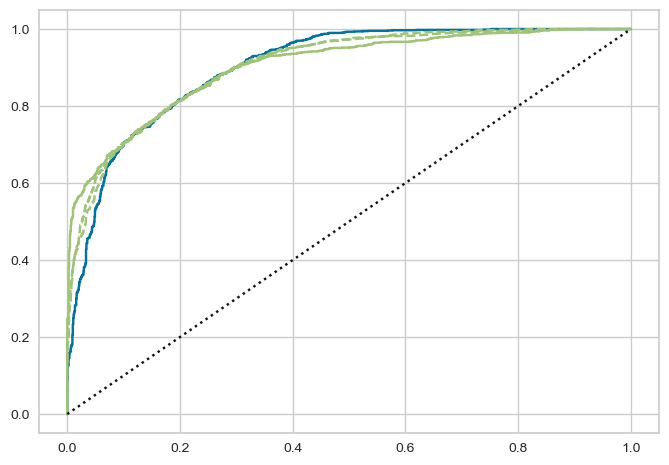

**Confusion Matrix**

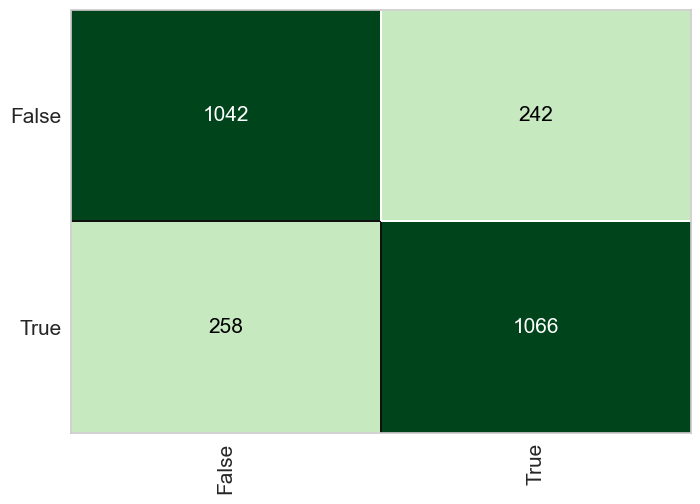

**Feature Importance**

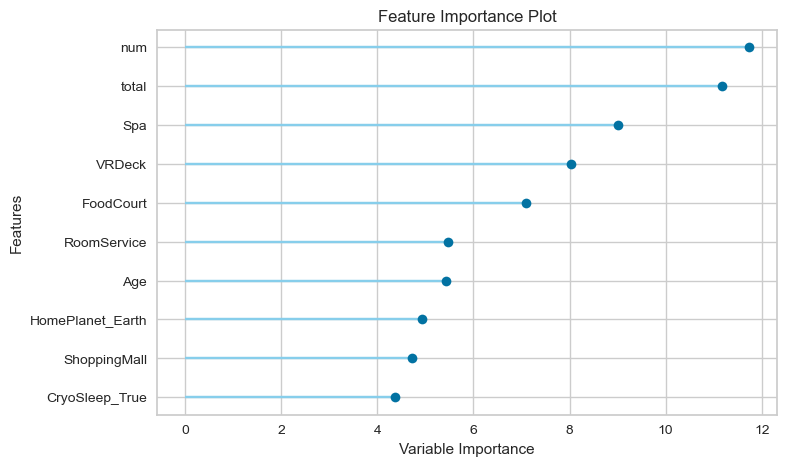

**STEP4:套用模型**

**自動調用最佳模型與其參數**

predictions = predict_model(best, data = test)

sub['Transported'] = predictions['Label']

sub.to_csv('submission_spaceshiplgbm.csv',index=False)